#### Johnson’s algorithm for All-pairs shortest paths

The problem is to find the shortest paths between every pair of vertices in a given weighted directed Graph and weights may be negative. We have discussed Floyd Warshall Algorithm for this problem.  The time complexity of the Floyd Warshall Algorithm is Θ(V3). 

Using Johnson’s algorithm, we can find all pair shortest paths in O(V2log V + VE) time. Johnson’s algorithm uses both Dijkstra and Bellman-Ford as subroutines. If we apply Dijkstra’s Single Source shortest path algorithm for every vertex, considering every vertex as the source, we can find all pair shortest paths in O(V*VLogV) time. 

So using Dijkstra’s single-source shortest path seems to be a better option than Floyd Warshall’s Algorithm(https://www.geeksforgeeks.org/floyd-warshall-algorithm-dp-16/?ref=lbp) , but the problem with Dijkstra’s algorithm is, that it doesn’t work for negative weight edge. The idea of Johnson’s algorithm is to re-weight all edges and make them all positive, then apply Dijkstra’s algorithm for every vertex. 

#### How to transform a given graph into a graph with all non-negative weight edges? 

One may think of a simple approach of finding the minimum weight edge and adding this weight to all edges. Unfortunately, this doesn’t work as there may be a different number of edges in different paths (See this for an example). If there are multiple paths from a vertex u to v, then all paths must be increased by the same amount, so that the shortest path remains the shortest in the transformed graph. The idea of Johnson’s algorithm is to assign a weight to every vertex. Let the weight assigned to vertex u be h[u]. 

We reweight edges using vertex weights. For example, for an edge (u, v) of weight w(u, v), the new weight becomes w(u, v) + h[u] – h[v]. The great thing about this reweighting is, that all set of paths between any two vertices is increased by the same amount and all negative weights become non-negative. Consider any path between two vertices s and t, the weight of every path is increased by h[s] – h[t], and all h[] values of vertices on the path from s to t cancel each other. 

#### How do we calculate h[] values? 

Bellman-Ford algorithm is used for this purpose. Following is the complete algorithm. A new vertex is added to the graph and connected to all existing vertices. The shortest distance values from the new vertex to all existing vertices are h[] values.

#### Algorithm: 

1. Let the given graph be G. Add a new vertex s to the graph, add edges from the new vertex to all vertices of G. Let the modified graph be G’. 

2. Run the Bellman-Ford algorithm on G’ with s as the source. Let the distances calculated by Bellman-Ford be h[0], h[1], .. h[V-1]. If we find a negative weight cycle, then return. Note that the negative weight cycle cannot be created by new vertex s as there is no edge to s. All edges are from s. 

3. Reweight the edges of the original graph. For each edge (u, v), assign the new weight as “original weight + h[u] – h[v]”. 

4. Remove the added vertex s and run Dijkstra’s algorithm for every vertex. 

#### How does the transformation ensure nonnegative weight edges? 

The following property is always true about h[] values as they are the shortest distances.

   h[v] <= h[u] + w(u, v) 

The property simply means that the shortest distance from s to v must be smaller than or equal to the shortest distance from s to u plus the weight of the edge (u, v). The new weights are w(u, v) + h[u] – h[v]. The value of the new weights must be greater than or equal to zero because of the inequality “h[v] <= h[u] + w(u, v)”.


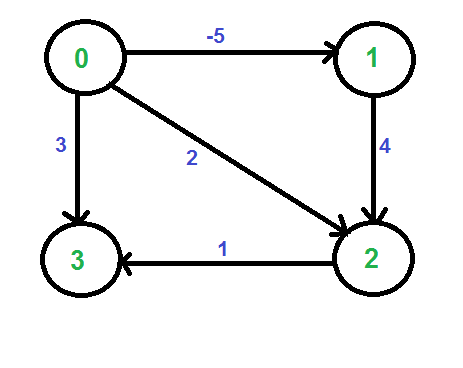

In [1]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/Johnson1.png")

We add a source s and add edges from s to all vertices of the original graph. In the following diagram s is 4. 

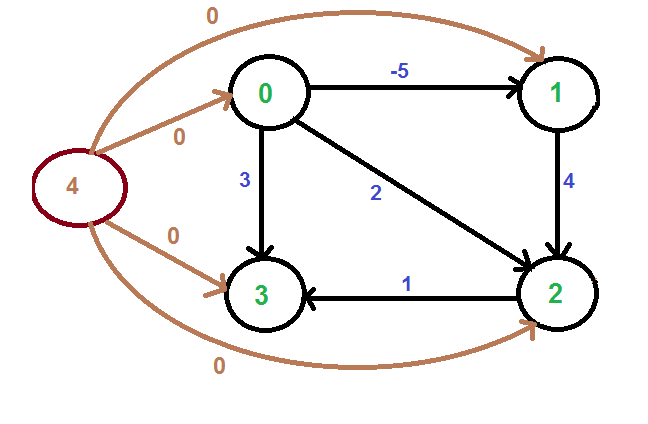

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/Johnson2.png")

We calculate the shortest distances from 4 to all other vertices using Bellman-Ford algorithm. The shortest distances from 4 to 0, 1, 2 and 3 are 0, -5, -1 and 0 respectively, i.e., h[] = {0, -5, -1, 0}. Once we get these distances, we remove the source vertex 4 and reweight the edges using following formula. w(u, v) = w(u, v) + h[u] – h[v].

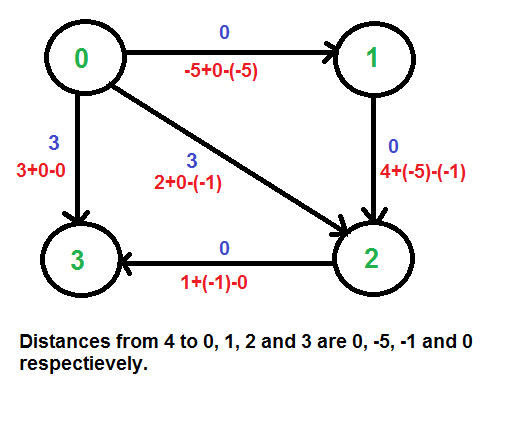

In [3]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/Johnson3.png")

In [1]:
import sys
V = 4
def minDistance(dist, sptSet):
	min_val = sys.maxsize
	min_index = 0

	for v in range(V):
		if sptSet[v] == False and dist[v] <= min_val:
			min_val = dist[v]
			min_index = v

	return min_index

def printSolution(dist):
	print("Following matrix shows the shortest distances between every pair of vertices")
	for i in range(V):
		for j in range(V):
			if dist[i][j] == sys.maxsize:
				print("{:>7s}".format("INF"), end="")
			else:
				print("{:>7d}".format(dist[i][j]), end="")
		print()

def floydWarshall(graph):
	dist = [[0 for x in range(V)] for y in range(V)]
	for i in range(V):
		for j in range(V):
			dist[i][j] = graph[i][j]
	for k in range(V):
		for i in range(V):
			for j in range(V):
				if dist[i][k] + dist[k][j] < dist[i][j]:
					dist[i][j] = dist[i][k] + dist[k][j]
	printSolution(dist)

if __name__ == "__main__":
	''' Let us create the following weighted graph
			10
	(0)------->(3)
		|		 /|\
	5 |		 |
		|		 | 1
	\|/		 |
	(1)------->(2)
			3		 '''

	graph = [[0, 5, sys.maxsize, 10],
			[sys.maxsize, 0, 3, sys.maxsize],
			[sys.maxsize, sys.maxsize, 0, 1],
			[sys.maxsize, sys.maxsize, sys.maxsize, 0]
			]
	floydWarshall(graph)


Following matrix shows the shortest distances between every pair of vertices
      0      5      8      9
    INF      0      3      4
    INF    INF      0      1
    INF    INF    INF      0


#### Time Complexity: 

The main steps in the algorithm are Bellman-Ford Algorithm called once and Dijkstra called V times. Time complexity of Bellman Ford is O(VE) and time complexity of Dijkstra is O(VLogV). So overall time complexity is O(V2log V + VE). 

The time complexity of Johnson’s algorithm becomes the same as Floyd Warshall’s Algorithm (https://www.geeksforgeeks.org/floyd-warshall-algorithm-dp-16/?ref=lbp)

when the graph is complete (For a complete graph E = O(V2). But for sparse graphs, the algorithm performs much better than Floyd Warshall’s Algorithm( https://www.geeksforgeeks.org/floyd-warshall-algorithm-dp-16/?ref=lbp ). 

#### Auxiliary Space: O(V2)

